# Developer Document
This document summarizes the workflow used for facenet face recognition pipeline

# Face Detection and Face Recognition Background

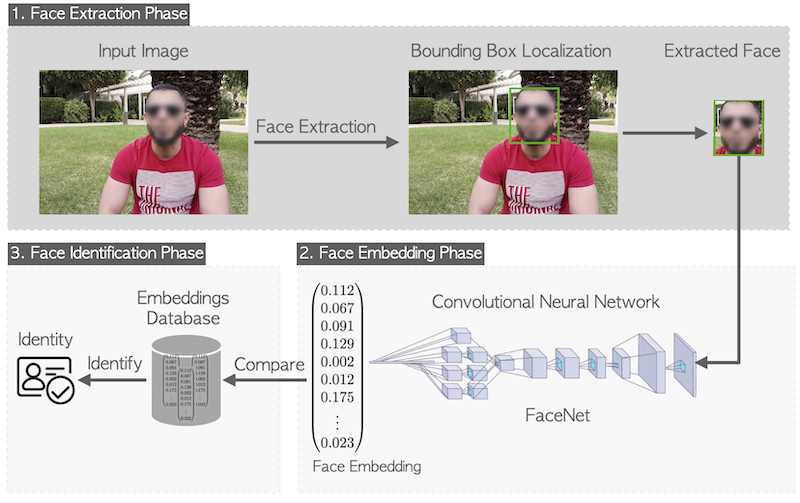

## Face detection Using MTCNN
MTCNN or Multi-Task Cascaded Convolutional Neural Networks is a neural network which detects faces and facial landmarks on images. It was published in 2016 by Zhang et al.

## Face Recognition Using Facenet
FaceNet is a deep neural network used for extracting features from an image of a person’s face. It was published in 2015 by Google researchers Schroff et al.

<p>FaceNet takes an image of the person’s face as input and outputs a vector of 128 numbers which represent the most important features of a face. In machine learning, this vector is called embedding. Why embedding? Because all the important information from an image is embedded into this vector. Basically, FaceNet takes a person’s face and compresses it into a vector of 128 numbers. Ideally, embeddings of similar faces are also similar.
Mapping high-dimensional data (like images) into low-dimensional representations (embeddings). Embeddings are vectors and we can interpret vectors as points in the Cartesian coordinate system. That means we can plot an image of a face in the coordinate system using its embeddings.<p\>

# phase 1: Training the model

In phase we gather training images for face to be trained. The images dataset is generated using multiple sources such as web images and movie videos. The images to be used should qualify the minimum criteria mentioned in dataset preparation guide. Here we use MTCNN to extract the face (MTCNN takes care of two important preprocessing steps (detection and alignment) in the initial stages.

In [11]:
#load the face mage
from PIL import  Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os,time,sys
import mtcnn
import cv2

#function to read image
def read_image(image_path):
  image = Image.open(image_path)
  #conver data to RGB
  image=image.convert('RGB')
  #covert to numpy array
  pixels=np.asarray(image)
  return pixels

#display image
def display_one_image(one_image,its_label):
  plt.imshow(one_image)
  print("label="+its_label)
  print("image shape:",one_image.shape)

# Input Image

label=input Image
image shape: (801, 1068, 3)


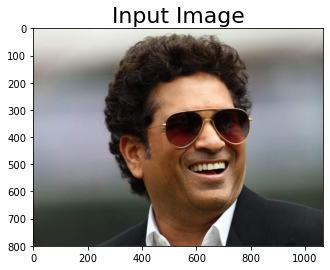

In [13]:
#read the image
#image=read_image('/home/niveus/PycharmProjects/deepface-elastic-research/all_faces.jpeg')
image=read_image('/home/jupyter/demos/vertexai/matching-engine/dataset/val/Sachin/sachin7.jpeg')
grey=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title('Input Image', fontsize=22)
display_one_image(image,'input Image')
#display_one_image(image,'input Image')

# Detect and Extract Face from the Image Using MTCNN

In [14]:
from mtcnn.mtcnn import MTCNN
detector=MTCNN()
faces_metadata1 = detector.detect_faces(image)
print("number of detected faces :", len(faces_metadata1))


number of detected faces : 1


# We have Control Over Faces to be Extracted based on confidence

# visualize the face

number of faces: 1
label=detected face
image shape: (160, 160, 3)


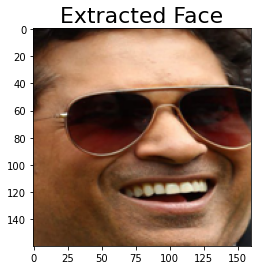

In [15]:
from numpy import asarray
def get_faces(image,faces_metadata,required_size=(160,160)):
  faces=[]
  for i in range(len(faces_metadata)):
    x=int(faces_metadata[i]['box'][0])
    y=int(faces_metadata[i]['box'][1])
    w=int(faces_metadata[i]['box'][2])
    h=int(faces_metadata[i]['box'][3])

    face=image[y:y+h,x:x+w]
    #resize pixel
    face=Image.fromarray(face)
    face=face.resize(required_size)
    face=asarray(face)  #np.asarray(face)
    faces.append(face)
  return faces

faces=get_faces(image,faces_metadata1,required_size=(160,160))
print('number of faces:',len(faces))

#display one image
plt.title('Extracted Face', fontsize=22)
display_one_image(faces[0],'detected face')

# Generate Face Embeddings




In [16]:
def get_embeded_facenet(face_pixels, model):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # standard pixel values accross channel
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # transform data into one sample
    samples = np.expand_dims(face_pixels, axis=0)
    # make prediction to get embeddings
    embedding = model.predict(samples)
    return embedding[0]

In [17]:
import tensorflow as tf
# complete the code from the lecture
print(tf.__version__)
facenet_128_model = tf.keras.models.load_model('./model/model/facenet_keras.h5')

2.8.0


# Generated Face Embedding is a 128 bit array representation for Extracted face

In [18]:
face_embedding = get_embeded_facenet(faces[0], facenet_128_model)
print("Length of face embedding:",len(face_embedding))
print("Generated face embedding:\n",face_embedding)

Length of face embedding: 128
Generated face embedding:
 [-0.2220712   0.3079059   0.97931784 -0.23826942 -1.6309998   2.544756
  0.828615   -0.5310781   0.00405061  0.19270754  0.38301903  0.23143134
  0.7142539  -1.1074929  -0.5252366   0.9619832   1.1722832   0.6579152
  1.764668   -0.07628696 -0.3407625   0.3096219   0.3514648  -0.4081084
 -0.9887325   0.7305903  -1.4764917   0.14247715 -0.4040231  -0.30296424
 -0.38742372 -1.3589506   0.02784658 -0.33953044  1.0953904  -1.6891576
  0.30226314 -0.31036496  1.5921726  -0.8376219   0.37314847 -1.288552
  0.81120956  1.2047626   1.8650633  -0.47934115  0.18207088 -0.61725473
  2.8615587  -0.6759145   1.9735827  -2.0336351  -1.8667675  -1.5953203
 -1.1239749   0.7405107   0.9133781   0.3435988  -0.26747328  0.7056868
 -0.19390792 -0.7939855   1.6810753  -0.33567786  0.18317014 -0.49568886
  0.2849324  -0.81475556  0.28827736  0.71670306  0.0356277   0.6813599
 -0.6982618  -0.07566287  1.2208396  -1.1047691  -0.32967168  0.7118513
  0.0

In [9]:
#if more than one face present
# call face embedding
face_embedding = np.array(face_embedding)
# print(face_embedding)
# exit()
for i in range(1, len(faces)):  # len(faces)
    face_embedding1 = get_embeded_facenet(faces[i], facenet_128_model)
    face_embedding = (face_embedding, face_embedding1)
    # face_embedding=(face_embedding1)
    face_embedding = np.vstack(face_embedding)

print(face_embedding)

[ 0.47638232  0.7031913  -0.09426352 -1.6759269  -1.5161405   2.2671187
  0.23024209  1.3213857   0.46947488 -0.65484554 -0.349672   -0.35069403
  0.44866818 -0.06713469 -2.0380442   0.39039677  1.1918312  -0.19237979
  1.8078632   1.7020371   1.0240681   1.4708706  -1.0571423   0.40675738
 -1.4315073   0.4660923  -0.68549013 -2.0540395  -0.49951416 -0.12328261
 -1.4455066  -0.18856564 -0.41942516 -0.0844005   0.28571644 -0.4450052
 -0.76744795  0.6879673   1.7383614  -1.0293287   0.45323    -1.0447822
 -0.343994   -0.10894796  0.8267744  -2.078393    1.2808806  -0.1248285
  1.5109948  -0.22050345  1.0471966   1.4740075  -0.9624044  -3.180627
 -1.1465548   0.74758    -0.02445646 -1.089226   -0.45088083  1.8180914
 -0.18359527 -0.8558626   1.3302065  -0.16613738  0.7130253  -0.69063926
  1.2394042  -0.96780926  0.8238277   0.1764413   0.9056591  -0.22822233
 -0.3942813   0.38060862  1.6349559  -1.8648696  -1.6389544  -1.4473922
  0.15770671 -0.8820905   1.0080476  -0.4136618   1.2733704